In [49]:
# crosstab
# merge
# reshape

In [50]:
import pandas as pd
csv_file_path = "/Users/ankitkumarsingh/Documents/imarticus/class_imc/Python/employee_details.csv"
df = pd.read_csv(csv_file_path)
df.columns = [cols.lower().replace('\t','') for cols in df.columns]

In [51]:
department_df = pd.read_csv('Department_Details.csv')
department_df.columns = [cols.lower() for cols in department_df.columns]

In [52]:
department_df

,employee_id,department_id,department_name,manager_id,location_id
0,100,10,Administration,200,1700
1,101,20,Marketing,201,1800
2,102,30,Human Resources\t,202,1700
3,103,40,Shipping,203,2400
4,104,50,IT\t,204,1700
5,105,60,Public Relations\t,108,2700
6,106,70,Executive,119,1900
7,107,80,Finance,117,2000
8,108,90,Corporate Tax\t,120,2001
9,109,100,Contracting,121,1700


In [120]:
acc_tran_df = pd.read_csv('BANK_ACCOUNT_TRANSACTION.csv')
acc_details_df = pd.read_csv('Bank_Account_Details.csv')

In [121]:
acc_tran_df,acc_details_df

(         Account_Number  Transaction_amount Transcation_channel Province  \
 0        4000-1956-3456             -2000.0       ATM withdrawl       CA   
 1        4000-1956-2001             -4000.0         POS-Walmart       MN   
 2        4000-1956-2001             -1600.0        UPI transfer       MN   
 3        4000-1956-2001             -6000.0      Bankers cheque       CA   
 4        4000-1956-2001             -3000.0         Net banking       CA   
 5        4000-1956-2001             23000.0      cheque deposit       MN   
 6        5000-1700-6091             40000.0        ECS transfer       NY   
 7        5000-1700-7791             40000.0        ECS transfer       NY   
 8        4000-1956-3401              8000.0        Cash Deposit       NY   
 9        4000-1956-5102             -6500.0      ATM withdrawal       NY   
 10       4000-1956-5698             -9000.0        Cash Deposit       NY   
 11       4000-1956-9977             50000.0        ECS transfer       NY   

In [122]:
# joining is based on index
# merge is flexible for column names,in tables 
# always make sure that colummn names are same in both the tables: 
# trim on each columns with list comprehension
all_acc_df = acc_tran_df.merge(acc_details_df, on = "Account_Number")
# acc_tran_df.merge(acc_details_df, left_on = "Account_Number",right_on = "Account_Number")
# acc_tran_df.merge(acc_details_df, suffixes = ("_ac_tran","acc_det"),how = 'inner/left/right/outer')

In [56]:
# '  test'.strip()

In [123]:
all_acc_df.shape

(16, 10)

In [124]:
all_acc_df

,Account_Number,Transaction_amount,Transcation_channel,Province,Transaction_Date,Customer_id,Account_type,Balance_amount,Account_status,Relationship_type
0,4000-1956-3456,-2000.0,ATM withdrawl,CA,2020-01-13,123001,SAVINGS,200000,ACTIVE,P
1,4000-1956-2001,-4000.0,POS-Walmart,MN,2020-02-14,123002,SAVINGS,400000,ACTIVE,P
2,4000-1956-2001,-1600.0,UPI transfer,MN,2020-01-19,123002,SAVINGS,400000,ACTIVE,P
3,4000-1956-2001,-6000.0,Bankers cheque,CA,2020-03-23,123002,SAVINGS,400000,ACTIVE,P
4,4000-1956-2001,-3000.0,Net banking,CA,2020-04-24,123002,SAVINGS,400000,ACTIVE,P
5,4000-1956-2001,23000.0,cheque deposit,MN,2020-03-15,123002,SAVINGS,400000,ACTIVE,P
6,5000-1700-6091,40000.0,ECS transfer,NY,2020-02-19,123004,RECURRING DEPOSITS,7500000,ACTIVE,S
7,4000-1956-3401,8000.0,Cash Deposit,NY,2020-01-19,123004,SAVINGS,655000,ACTIVE,P
8,4000-1956-5102,-6500.0,ATM withdrawal,NY,2020-03-14,123005,SAVINGS,300000,ACTIVE,P
9,4000-1956-5698,-9000.0,Cash Deposit,NY,2020-03-27,123006,SAVINGS,455000,ACTIVE,P


In [58]:
cross_tab_df  = pd.crosstab(\
    index = [all_acc_df['Account_type'],all_acc_df['Transcation_channel']],\
    columns = all_acc_df['Province'],values = all_acc_df['Transaction_amount'].abs(),\
    aggfunc = sum)


/var/folders/26/w56ybb2s7tb9rmnhvsgnxtz80000gn/T/ipykernel_3293/3109515074.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cross_tab_df  = pd.crosstab(\


In [59]:
cross_tab_df

Province                                    CA       MN       NY
Account_type       Transcation_channel                          
Add-on Credit Card Shopping Cart           NaN      NaN  11000.0
Credit Card        POS-Walmart             NaN   9000.0   5000.0
                   Shopping Cart           NaN  10500.0      NaN
RECURRING DEPOSITS ECS transfer            NaN      NaN  90000.0
SAVINGS            ATM withdrawal          NaN      NaN   6500.0
                   ATM withdrawl        2000.0      NaN      NaN
                   Bankers cheque       6000.0      NaN      NaN
                   Cash Deposit            NaN      NaN  17000.0
                   Net banking          3000.0      NaN      NaN
                   POS-Walmart             NaN   4000.0      NaN
                   UPI transfer            NaN   1600.0      NaN
                   cheque deposit          NaN  23000.0      NaN

<Axes: xlabel='Account_type'>

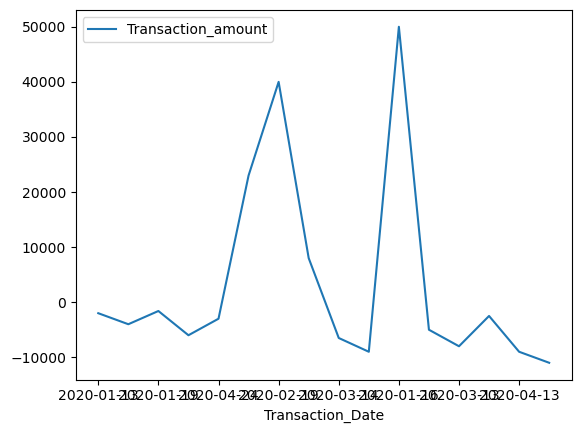

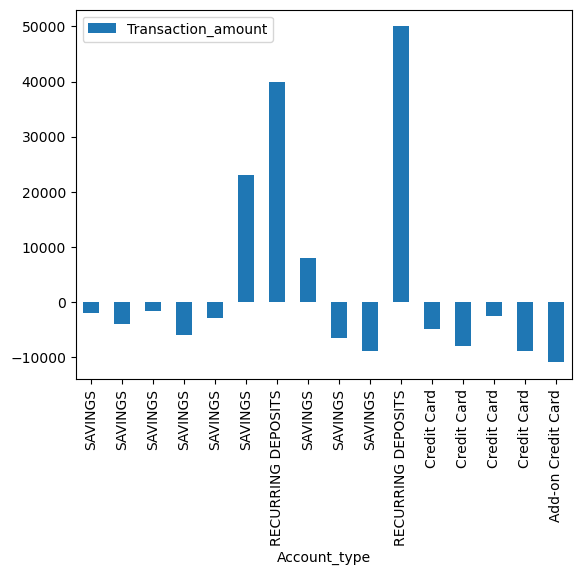

In [60]:
all_acc_df.plot(x='Transaction_Date',y='Transaction_amount',legend = 'Province')
all_acc_df.plot(x='Account_type',y='Transaction_amount',kind = 'bar')

In [61]:
# when do we use a line plot
    # when we have time series data
    # when we want to analyze sometimg over time time period
    # when we want to do sequential analysis of data

In [62]:
# def test(*args):
#     print (type(args))
#     return sum(args)
# test(1,1,23,4,5,6,7)

In [63]:
import matplotlib.pyplot as plt

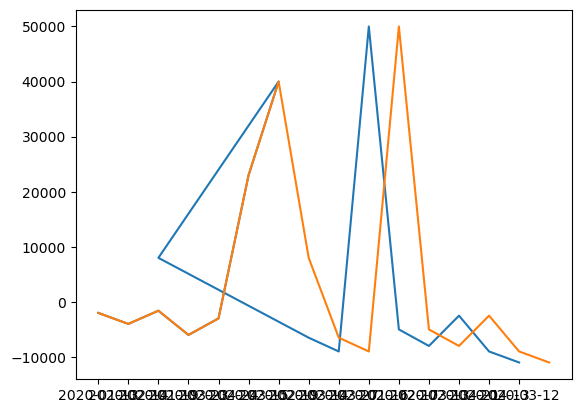

In [64]:
plt.plot(all_acc_df['Transaction_Date'], all_acc_df['Transaction_amount'],all_acc_df['Transaction_amount'])

In [65]:
type(plt)

module

In [66]:
x = all_acc_df['Transaction_Date']
y  =all_acc_df['Transaction_amount']

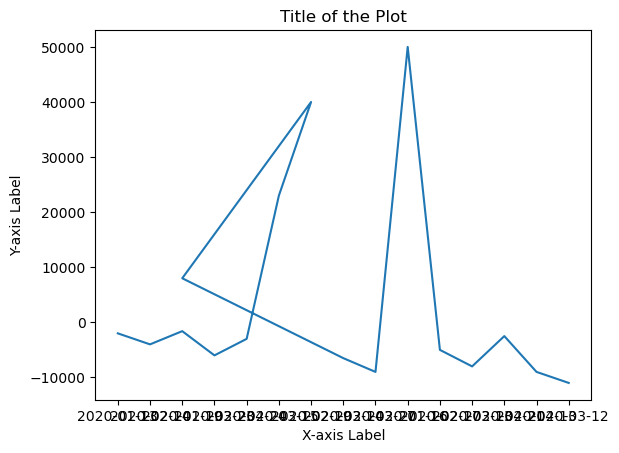

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


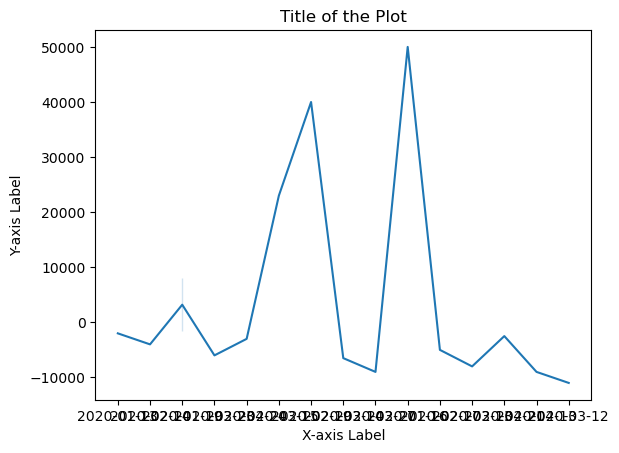

In [67]:
# Line Plot
import matplotlib.pyplot as plt

# Basic Line Plot
plt.plot(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


import seaborn as sns

# Basic Line Plot
sns.lineplot(x=x, y=y, data=all_acc_df)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: unsupported operand type(s) for &: 'tuple' and 'tuple'

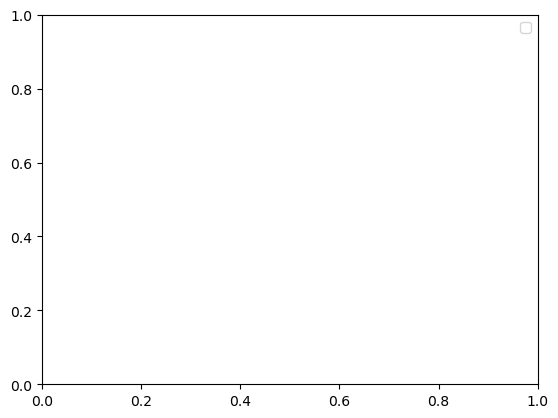

In [68]:
plt.legend()
plt.xlim() & plt.ylim()
plt.xticks() & plt.yticks()
plt.grid()
plt.savefig()
plt.subplots()
ax.plot()



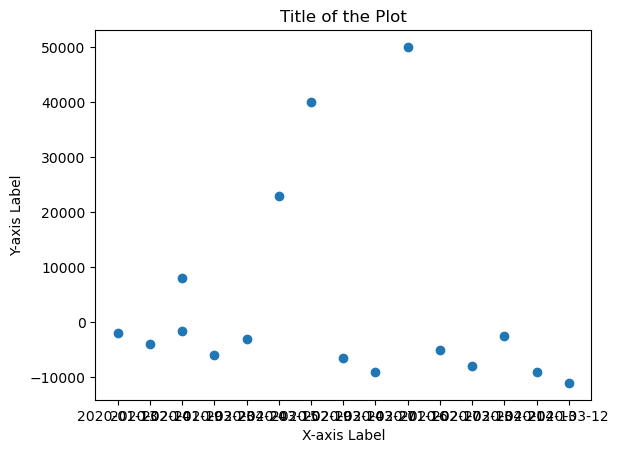

NameError: name 'data' is not defined

In [69]:
import matplotlib.pyplot as plt

# Basic Scatter Plot
plt.scatter(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


import seaborn as sns

# Basic Scatter Plot
sns.scatterplot(x=x, y=y, data=data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Basic Bar Plot
plt.bar(x, height)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


import seaborn as sns

# Basic Bar Plot
sns.barplot(x=x, y=y, data=data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Basic Histogram
plt.hist(data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()

import seaborn as sns

# Basic Histogram
sns.histplot(data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Basic Box Plot
plt.boxplot(data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()

import seaborn as sns

# Basic Box Plot
sns.boxplot(x=x, y=y, data=data)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()


In [115]:
import matplotlib.pyplot as plt

# Basic Heatmap
plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Title of the Plot')
plt.show()


import seaborn as sns

# Basic Heatmap
sns.heatmap(data, cmap='viridis')
plt.title('Title of the Plot')
plt.show()


NameError: name 'data' is not defined

In [ ]:
import seaborn as sns

# Basic Pair Plot
sns.pairplot(data)
plt.title('Title of the Plot')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Subplots
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Subplot 1')

axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Subplot 2')

axs[1, 0].bar(x, y)
axs[1, 0].set_title('Subplot 3')

axs[1, 1].hist(data)
axs[1, 1].set_title('Subplot 4')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [2, 3, 5, 7, 11]
y3 = [5, 6, 2, 3, 13]

# Multiline Plot
plt.plot(x, y1, label='Line 1', marker='o')
plt.plot(x, y2, label='Line 2', marker='s')
plt.plot(x, y3, label='Line 3', marker='^')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Multiline Plot')
plt.legend()
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data in long-form
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5] * 3,
    'y': [1, 4, 9, 16, 25, 2, 3, 5, 7, 11, 5, 6, 2, 3, 13],
    'line': ['Line 1'] * 5 + ['Line 2'] * 5 + ['Line 3'] * 5
})

# Multiline Plot
sns.lineplot(x='x', y='y', hue='line', data=data, marker='o')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Multiline Plot')
plt.legend(title='Lines')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset('tips')

# Basic Strip Plot - only in seaborn
sns.stripplot(x='day', y='total_bill', data=data)
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Strip Plot')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset('tips')

# Basic Joint Plot - only in seaborn
sns.jointplot(x='total_bill', y='tip', data=data, kind='scatter')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset('tips')

# Basic Violin Plot - only in seaborn
sns.violinplot(x='day', y='total_bill', data=data)
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Violin Plot')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset('tips')

# Basic Count Plot - seaborn
sns.countplot(x='day', data=data)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()


In [ ]:
Strip Plot
Use: A strip plot is used to display the distribution of a variable along a categorical axis. 
It is useful for seeing the spread and distribution of data points.
Joint Plot
Use: A joint plot is used to visualize the relationship between two variables along with their univariate distributions. 
It combines scatter plots with histograms or KDE plots.
Violin Plot
Use: A violin plot is used to visualize the distribution of a numeric variable for one or more categorical variables. 
It combines aspects of a box plot and a KDE plot to show density and distribution.
Swarm Plot
Use: A swarm plot is used to display the distribution of a numeric variable for one or more categorical variables. 
It shows individual data points, which can prevent overlapping by arranging them side by side.
Count Plot
Use: A count plot is used to show the counts of observations in each categorical bin using bars. 
It’s useful for visualizing the distribution of categorical data.


In [ ]:
x = all_acc_df['Transaction_Date']
y  =all_acc_df['Transaction_amount']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2020-01-13'),
  Text(1, 0, '2020-02-14'),
  Text(2, 0, '2020-01-19'),
  Text(3, 0, '2020-03-23'),
  Text(4, 0, '2020-04-24'),
  Text(5, 0, '2020-03-15'),
  Text(6, 0, '2020-02-19'),
  Text(7, 0, '2020-03-14'),
  Text(8, 0, '2020-03-27'),
  Text(9, 0, '2020-01-16'),
  Text(10, 0, '2020-02-17'),
  Text(11, 0, '2020-03-13'),
  Text(12, 0, '2020-04-21'),
  Text(13, 0, '2020-04-13'),
  Text(14, 0, '2020-03-12')])

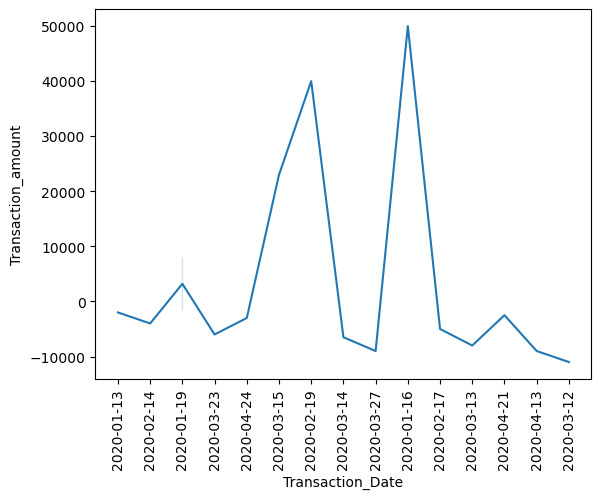

In [83]:
sns.lineplot(data=all_acc_df,x='Transaction_Date',y='Transaction_amount')
plt.xticks(rotation=90)

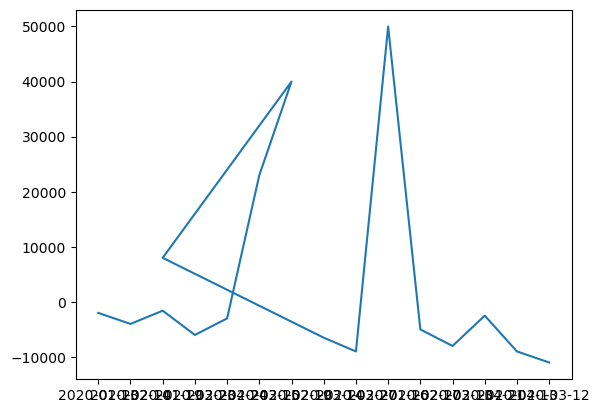

In [80]:
plt.plot(all_acc_df['Transaction_Date'],all_acc_df['Transaction_amount'])

In [86]:
#matplotlib for barplot
#q for each of the transaction channel what is the total transaction amount
all_acc_df.sample()

,Account_Number,Transaction_amount,Transcation_channel,Province,Transaction_Date,Customer_id,Account_type,Balance_amount,Account_status,Relationship_type
7,4000-1956-3401,8000.0,Cash Deposit,NY,2020-01-19,123004,SAVINGS,655000,ACTIVE,P


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ATM withdrawl'),
  Text(1, 0, 'POS-Walmart'),
  Text(2, 0, 'UPI transfer'),
  Text(3, 0, 'Bankers cheque'),
  Text(4, 0, 'Net banking'),
  Text(5, 0, 'cheque deposit'),
  Text(6, 0, 'ECS transfer'),
  Text(7, 0, 'Cash Deposit'),
  Text(8, 0, 'ATM withdrawal'),
  Text(9, 0, 'Shopping Cart')])

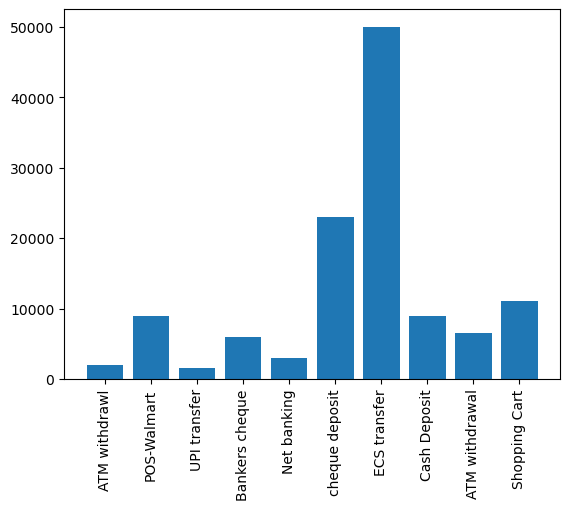

In [94]:
plt.bar(all_acc_df['Transcation_channel'],all_acc_df['Transaction_amount'].abs())
plt.xticks(rotation=90)

In [99]:
#making 
all_acc_df['Abs_tran_amt']=all_acc_df['Transaction_amount'].abs()

In [100]:
all_acc_df.columns

Index(['Account_Number', 'Transaction_amount', 'Transcation_channel',
       'Province', 'Transaction_Date', 'Customer_id', 'Account_type',
       'Balance_amount', 'Account_status', 'Relationship_type',
       'Abs_tran_amt'],
      dtype='object')

Text(0.5, 1.0, 'Total transaction amount for each of the transaction channel')

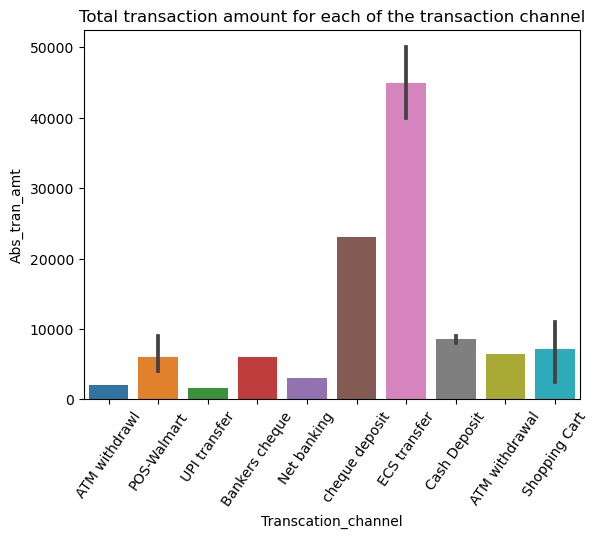

In [104]:
sns.barplot(data=all_acc_df,x='Transcation_channel',y='Abs_tran_amt')
plt.xticks(rotation=55)
plt.title('Total transaction amount for each of the transaction channel')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5')])

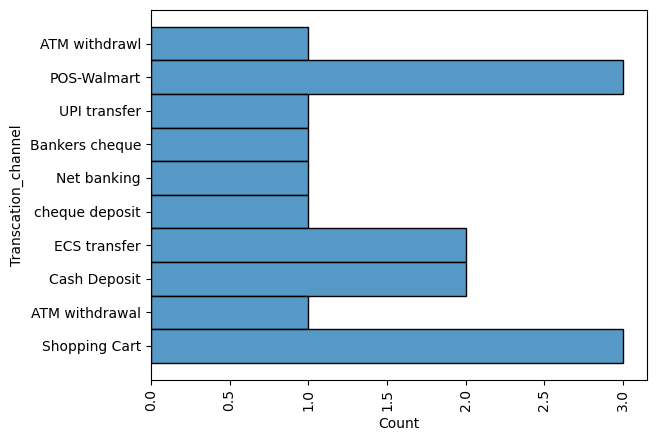

In [110]:
sns.histplot(data=all_acc_df,y='Transcation_channel',multiple='dodge')
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x15d8d2f90>,
 'caps': [<matplotlib.lines.Line2D at 0x15cba2b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d8da3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15cba15d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cba0b50>],
 'means': []}

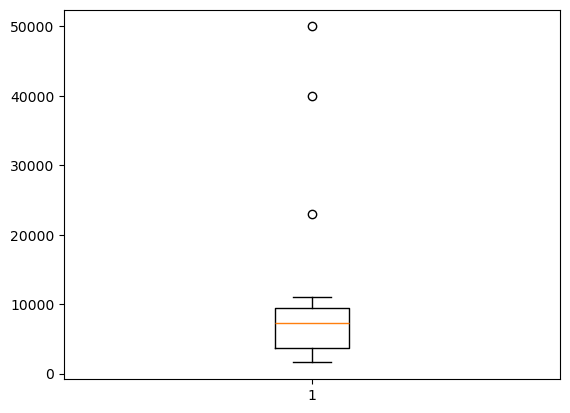

In [112]:
# box plot
# used for identifying outliers

plt.boxplot(all_acc_df['Abs_tran_amt'])

<Axes: ylabel='Abs_tran_amt'>

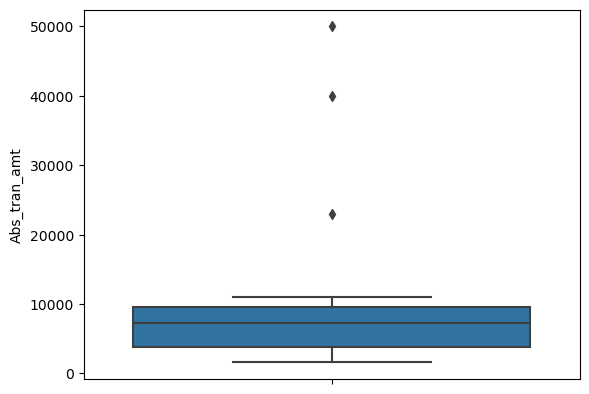

In [113]:
sns.boxplot(data=all_acc_df,y='Abs_tran_amt')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

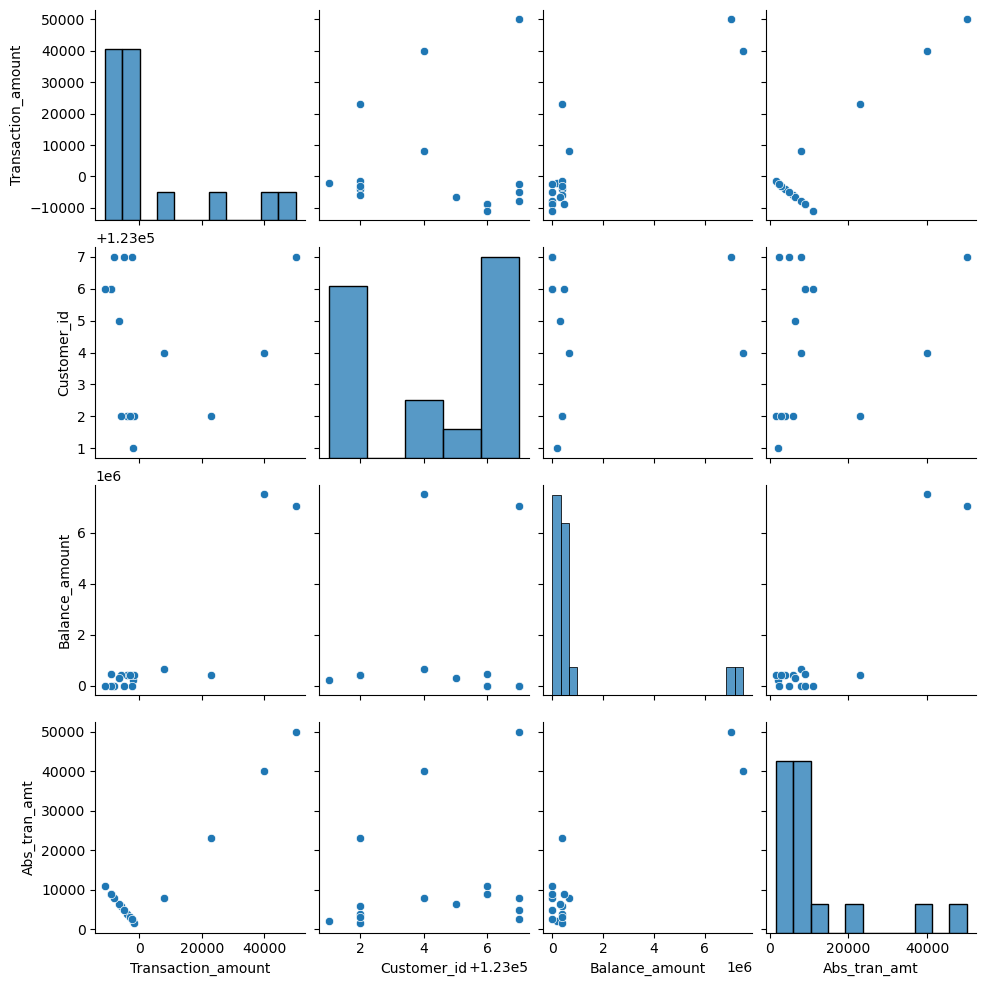

In [114]:
# relationship bw columns,variables, features

# pairplot
# scatterplot
# heatmap
sns.pairplot(data=all_acc_df)

In [116]:
# Strip Plot
# Use: A strip plot is used to display the distribution of a variable along a categorical axis. 
# It is useful for seeing the spread and distribution of data points.
# Joint Plot
# Use: A joint plot is used to visualize the relationship between two variables along with their univariate distributions. 
# It combines scatter plots with histograms or KDE plots.
# Violin Plot
# Use: A violin plot is used to visualize the distribution of a numeric variable for one or more categorical variables. 
# It combines aspects of a box plot and a KDE plot to show density and distribution.
# Swarm Plot
# Use: A swarm plot is used to display the distribution of a numeric variable for one or more categorical variables. 
# It shows individual data points, which can prevent overlapping by arranging them side by side.
# Count Plot
# Use: A count plot is used to show the counts of observations in each categorical bin using bars. 
# It’s useful for visualizing the distribution of categorical data.


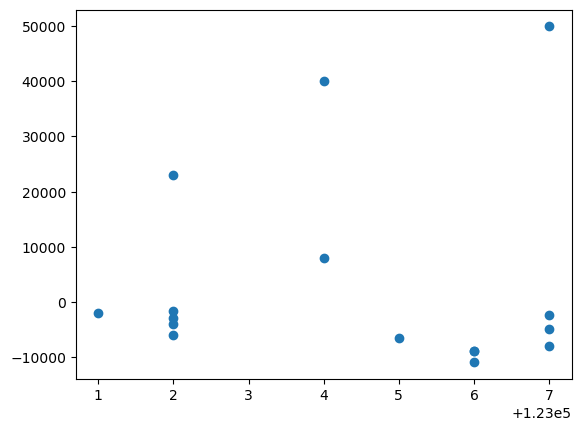

In [118]:
#scatter plot
plt.scatter(all_acc_df['Customer_id'],all_acc_df['Transaction_amount'])

In [119]:
#heatmap
sns.heatmap(merged_df)

NameError: name 'merged_df' is not defined

In [125]:
plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [127]:
all_acc_df.columns

Index(['Account_Number', 'Transaction_amount', 'Transcation_channel',
       'Province', 'Transaction_Date', 'Customer_id', 'Account_type',
       'Balance_amount', 'Account_status', 'Relationship_type'],
      dtype='object')

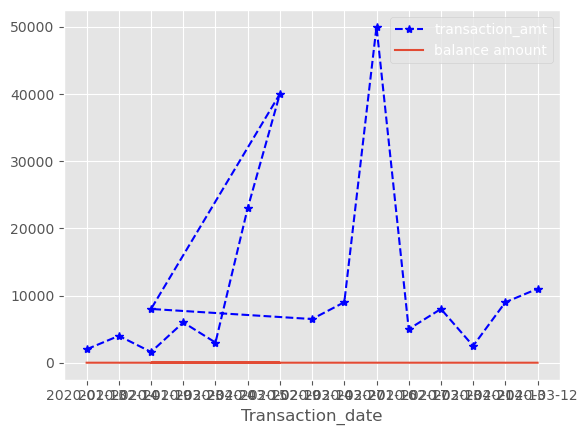

In [164]:
plt.plot(all_acc_df['Transaction_Date'],all_acc_df['Transaction_amount'].abs(),marker = '*',label = 'transaction_amt',color = 'b',linestyle = '--')
plt.xlabel('Transaction_date')
plt.plot(all_acc_df['Transaction_Date'],all_acc_df['Balance_amount']/10000000,label = 'balance amount')
plt.legend()
plt.grid(color = 'w')
plt.show()

Text(0.5, 0, 'Transaction_date')

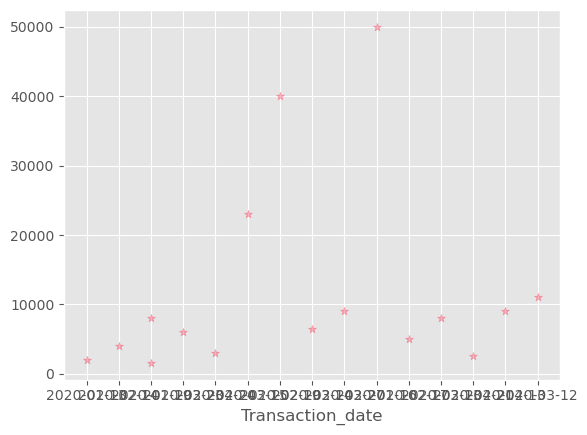

In [165]:
plt.style.use('ggplot')
plt.scatter(all_acc_df['Transaction_Date'],all_acc_df['Transaction_amount'].abs(),marker='*', color = '#f245',label='Circle')
plt.xlabel('Transaction_date')

In [157]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']